<a href="https://colab.research.google.com/github/FelipeFerAl/ImageProcessing/blob/main/Conceptos/OperacionesMorfologicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias y Carga de la base de datos

In [ ]:
import numpy as np
import zipfile
import os
import matplotlib.pylab as pylab
from IPython.display import clear_output
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage.morphology import binary_erosion, rectangle, square

In [ ]:
!git clone https://github.com/FelipeFerAl/ImageProcessing.git

path = '/content/ImageProcessing/images.zip'

extract_path = os.path.dirname('/content/images')

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

clear_output(False)

#Erosión

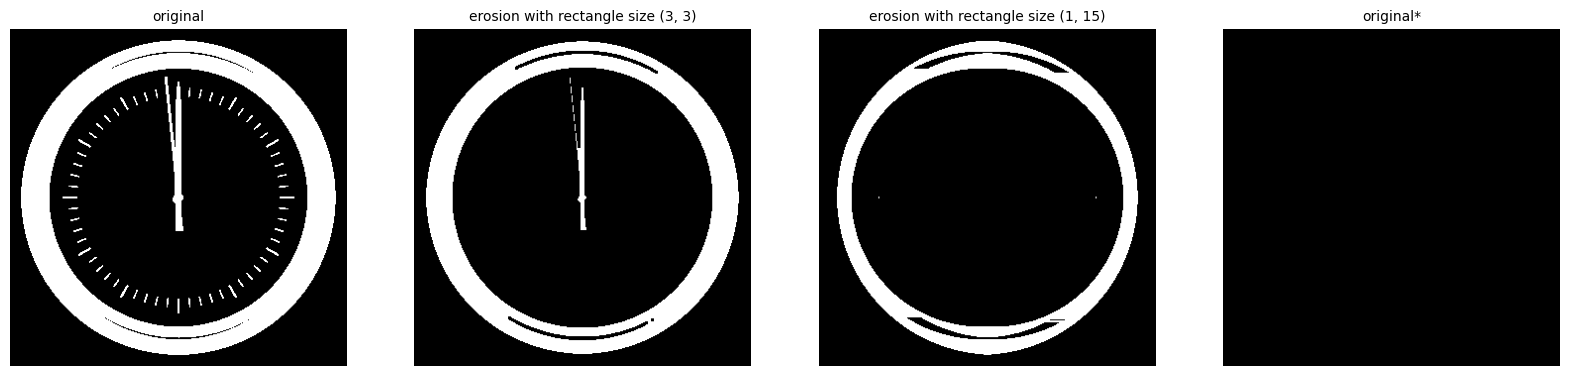

In [ ]:
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray,rgba2rgb
import matplotlib.pylab as pylab
import numpy as np
from skimage.morphology import binary_erosion, rectangle
path='/content/images/'
def plot_image(image, title=''):
    pylab.title(title, size=10), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
im = rgb2gray(imread(path+'clock2.jpg'))
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1
im2 = im.copy()

pylab.gray()
pylab.figure(figsize=(20,20))
pylab.subplot(1,4,1), plot_image(im, 'original')

r=rectangle(3,3)
im1 = binary_erosion(im,r)
pylab.subplot(1,4,2), plot_image(im1, 'erosion with rectangle size '+str(r.shape))

r=rectangle(1,15)
im1 = binary_erosion(im, r)
pylab.subplot(1,4,3), plot_image(im1, 'erosion with rectangle size '+str(r.shape))

r = rectangle(28,29)
im1 = binary_erosion(im2, r)
pylab.subplot(1,4,4), plot_image(im1, 'original*')

pylab.show()

#Erosión manual

(<Axes: title={'center': 'erosion with rectangle size (1, 15)'}>, None)

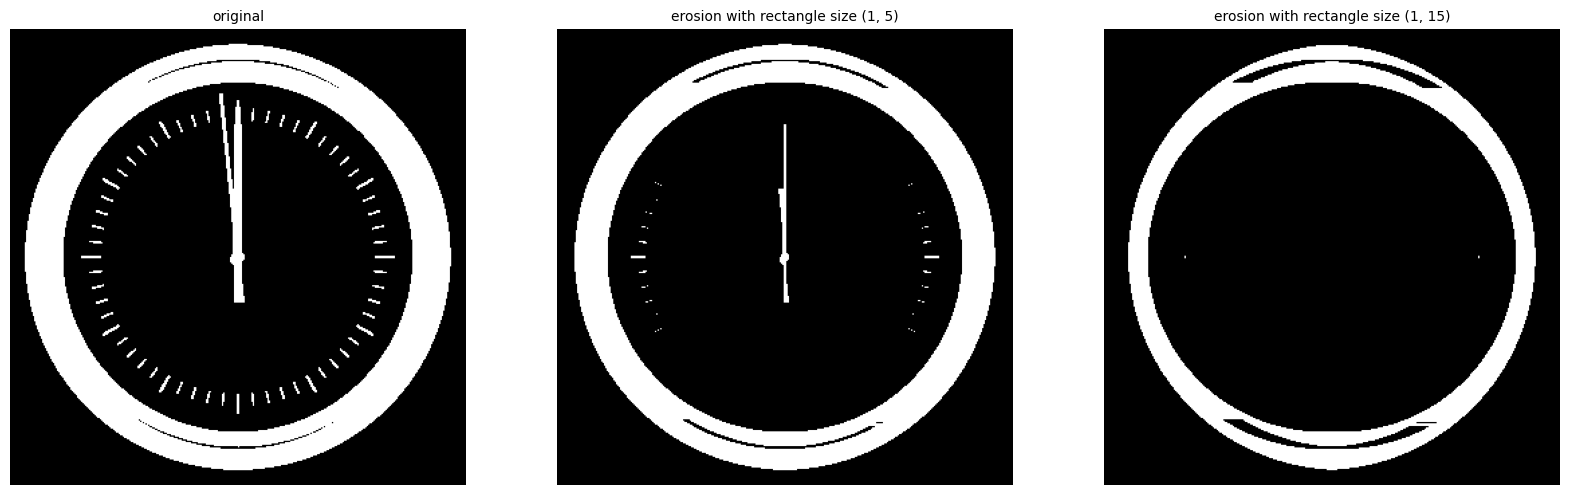

In [ ]:
def manual_erosion(image, struct_element):
    rows, cols = image.shape
    struct_rows, struct_cols = struct_element.shape
    result = image.copy()#np.zeros(image.shape)

    struct_center_row, struct_center_col = struct_rows // 2, struct_cols // 2

    for i in range(struct_center_row, rows - struct_center_row):
        for j in range(struct_center_col, cols - struct_center_col):
            roi = image[i - struct_center_row: i + struct_center_row + 1,
                        j - struct_center_col: j + struct_center_col + 1]


            if np.all(roi*struct_element):  #All para erosión
                result[i, j] = 1#roi.max()
            else:
                result[i, j] = 0#roi.min()

    return result



im = rgb2gray(imread(path+'clock2.jpg'))
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1
# Aplicar la erosión manual
struct_element=rectangle(1,5)
r=rectangle(1,5)
im1 = manual_erosion(im,r)
pylab.figure(figsize=(20,20))
pylab.subplot(1,3,1), plot_image(im, 'original')
r=rectangle(1,5)
im1 = manual_erosion(im,r)
pylab.subplot(1,3,2), plot_image(im1, 'erosion with rectangle size '+str(r.shape))
r=rectangle(1,15)
im1 = manual_erosion(im,r)
pylab.subplot(1,3,3), plot_image(im1, 'erosion with rectangle size '+str(r.shape))

#Dilatación

<Figure size 640x480 with 0 Axes>

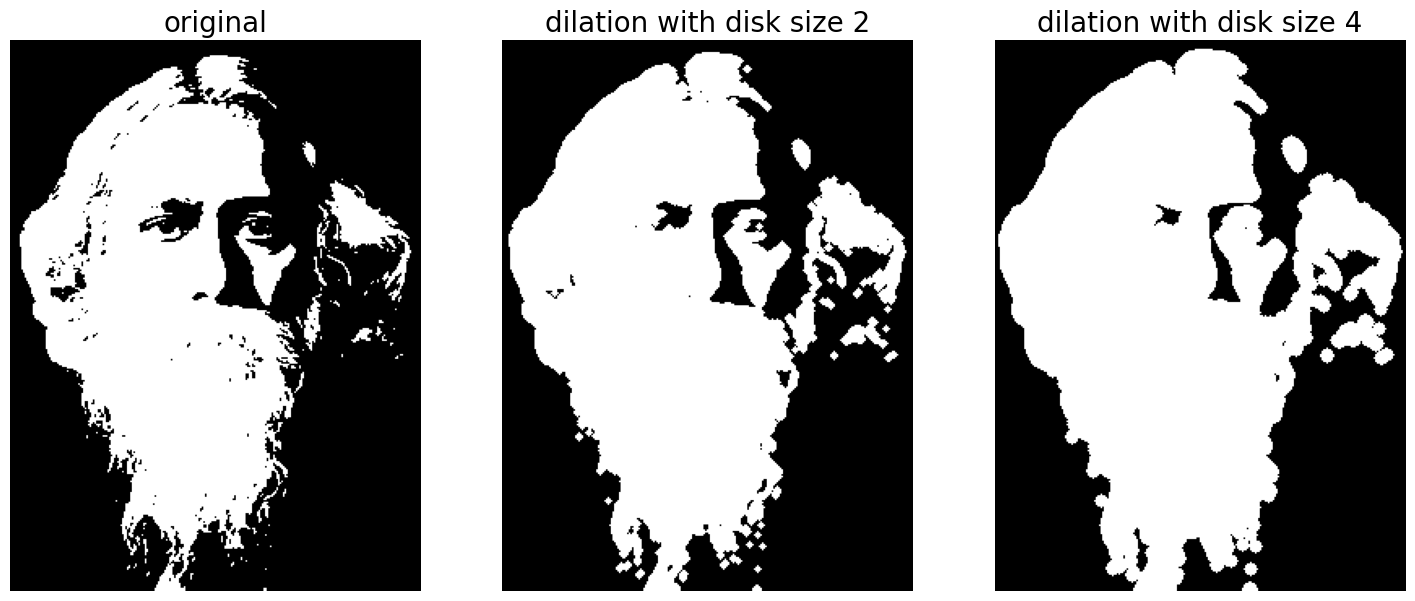

In [ ]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
im = imread(path+'tagore.png')
im=im/im.max()
im = 1.0 - im[...,3]
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(18,9))
pylab.subplot(131)
pylab.imshow(im)
pylab.title('original', size=20)
pylab.axis('off')
for d in range(1,3):
    pylab.subplot(1,3,d+1)
    im1 = binary_dilation(im, disk(2*d))
    pylab.imshow(im1)
    pylab.title('dilation with disk size ' + str(2*d), size=20)
    pylab.axis('off')
pylab.show()

#Apertura y Cierre

<Figure size 640x480 with 0 Axes>

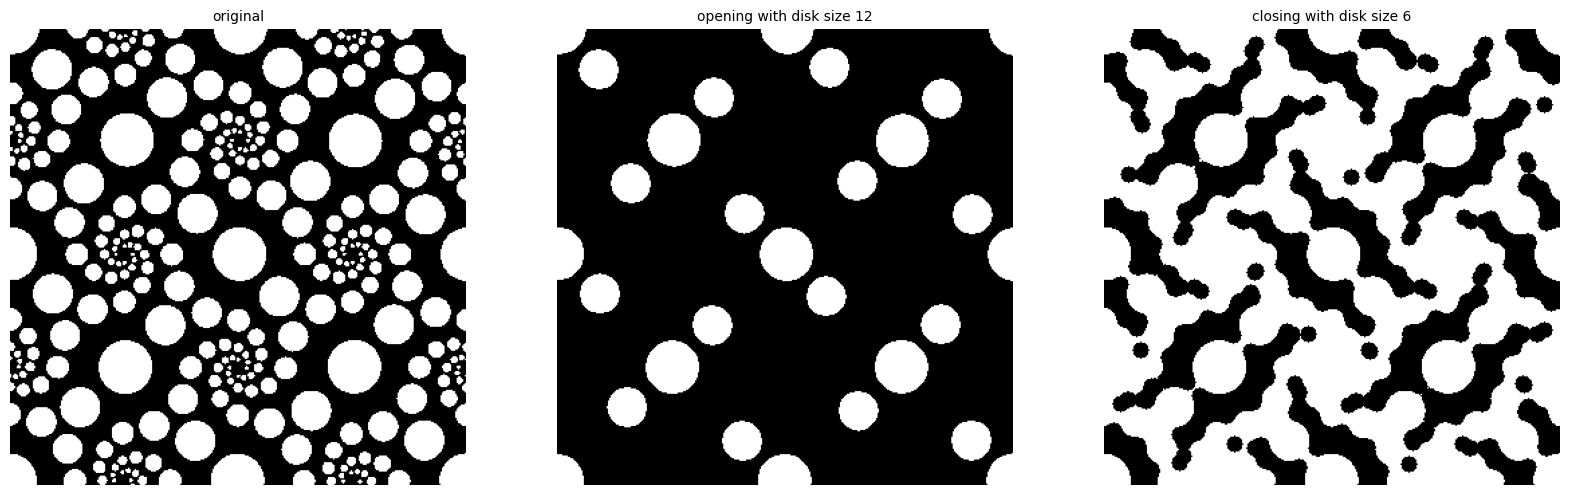

In [ ]:
from skimage.morphology import binary_opening, binary_closing, binary_erosion, binary_dilation, disk
im = rgb2gray(imread(path+'circles.jpg'))
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_opening(im, disk(12))
pylab.subplot(1,3,2), plot_image(im1, 'opening with disk size ' + str(12))
im1 = binary_closing(im, disk(6))
pylab.subplot(1,3,3), plot_image(im1, 'closing with disk size ' + str(6))
pylab.show()

#Skeletons

<Figure size 640x480 with 0 Axes>

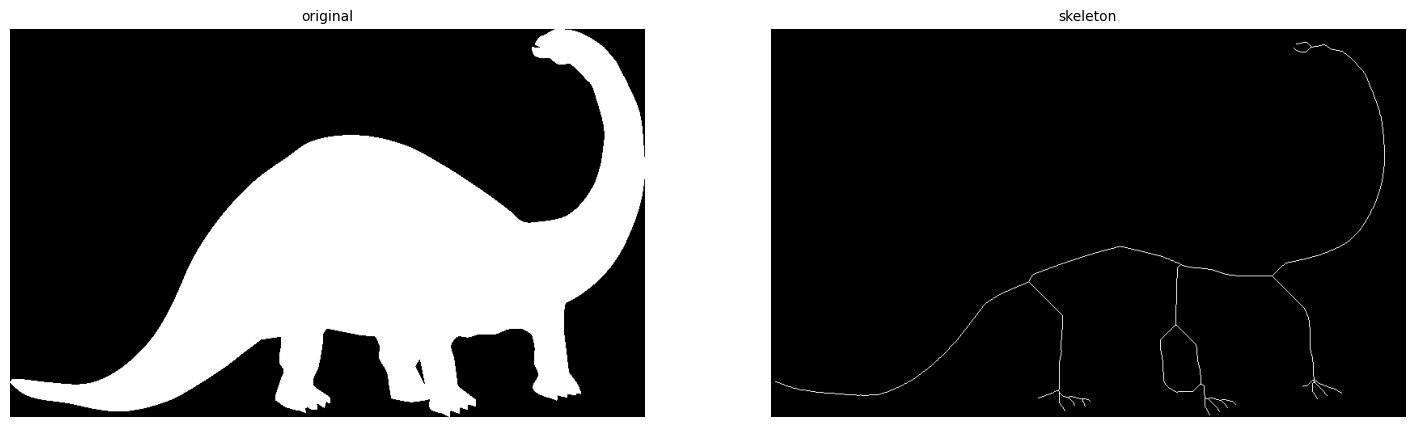

In [ ]:
def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    pylab.gray()
    pylab.figure(figsize = sz)
    pylab.subplot(1,2,1), plot_image(original, 'original')
    pylab.subplot(1,2,2), plot_image(filtered, filter_name)
    pylab.show()

from skimage.morphology import skeletonize
im = img_as_float(imread(path+'dynasaur.png')[...,3])
threshold = 0.5
im[im <= threshold] = 0
im[im > threshold] = 1
skeleton = skeletonize(im)
plot_images_horizontally(im, skeleton, 'skeleton',sz=(18,9))

#Cálculo del contorno de la figura

<Figure size 640x480 with 0 Axes>

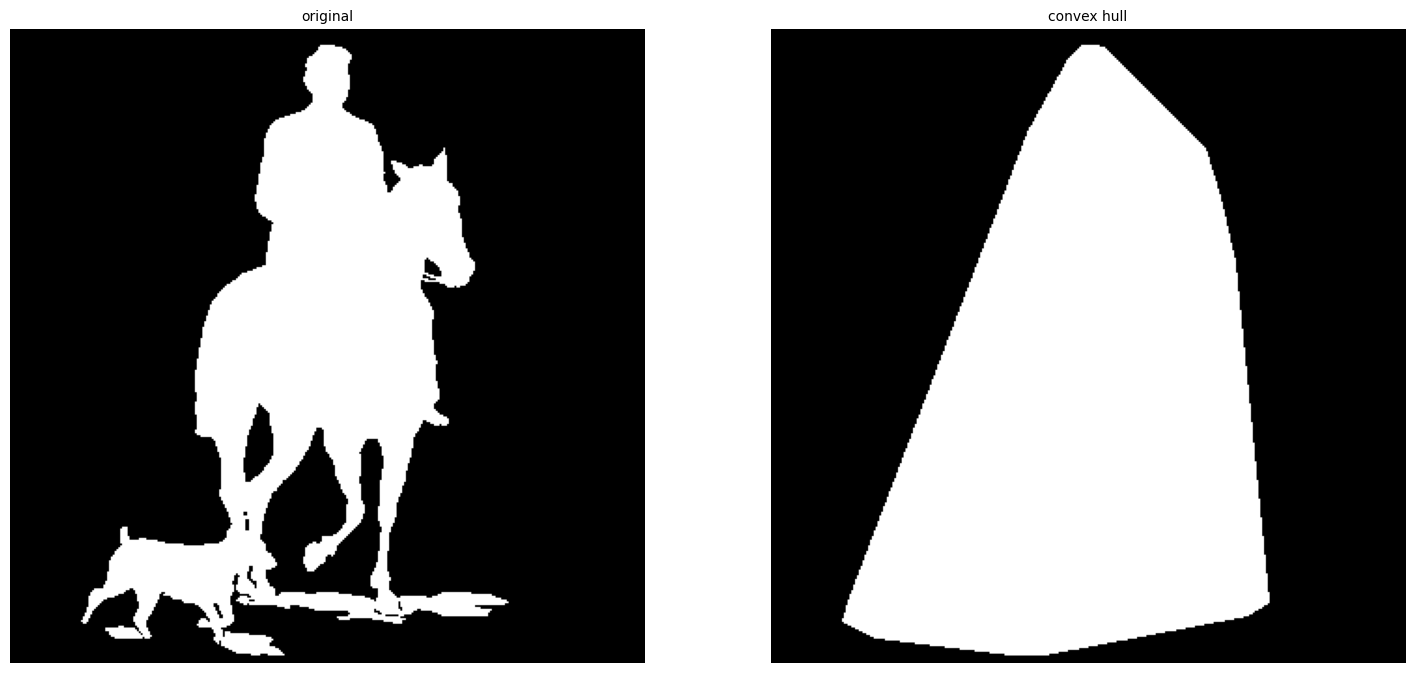

In [ ]:
from skimage.morphology import convex_hull_image

im = rgb2gray(imread(path+'horse-dog.jpg'))
threshold = 0.5
im[im < threshold] = 0 # convert to binary image
im[im >= threshold] = 1
chull = convex_hull_image(im)
plot_images_horizontally(im, chull, 'convex hull', sz=(18,9))

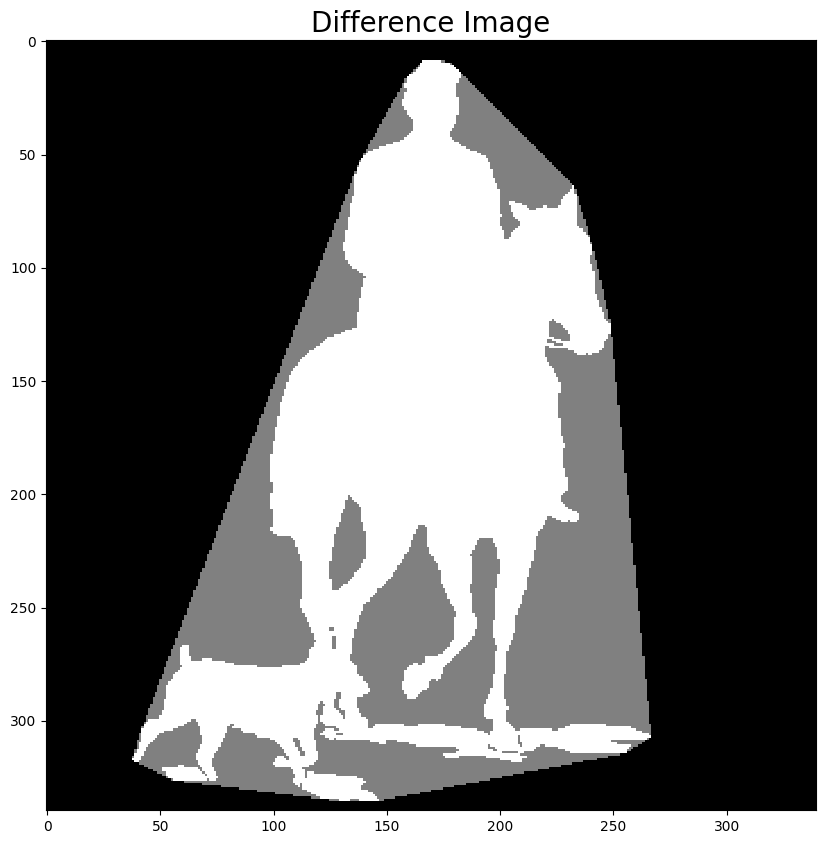

In [ ]:
im = im.astype(np.bool_)
chull_diff = img_as_float(chull.copy())
chull_diff[im] = 2
pylab.figure(figsize=(20,10))
pylab.imshow(chull_diff, cmap=pylab.cm.gray, interpolation='nearest')
pylab.title('Difference Image', size=20)
pylab.show()

#Eliminación de objetos

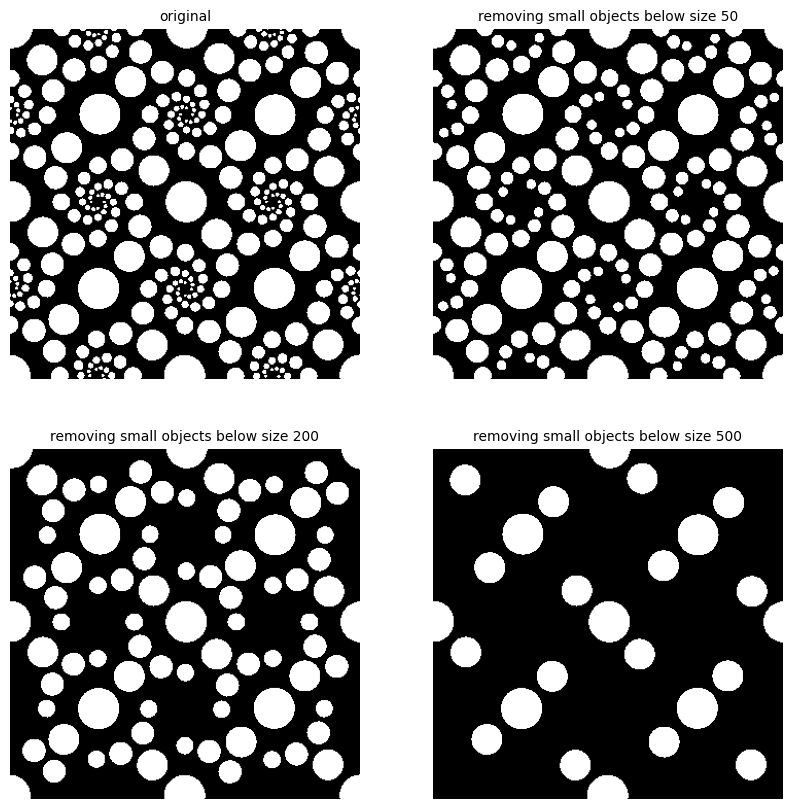

In [ ]:
from skimage.morphology import remove_small_objects
im = rgb2gray(imread(path+'circles.jpg'))
im[im > 0.5] = 1 # create binary image by thresholding with fixed threshold
0.5
im[im <= 0.5] = 0
im = im.astype(np.bool_)
pylab.figure(figsize=(10,10))
pylab.subplot(2,2,1), plot_image(im, 'original')
i = 2
for osz in [50, 200, 500]:
    im1 = remove_small_objects(im, osz, connectivity=1)
    pylab.subplot(2,2,i), plot_image(im1, 'removing small objects below size ' + str(osz))
    i += 1
pylab.show()

#Silueta

<Figure size 640x480 with 0 Axes>

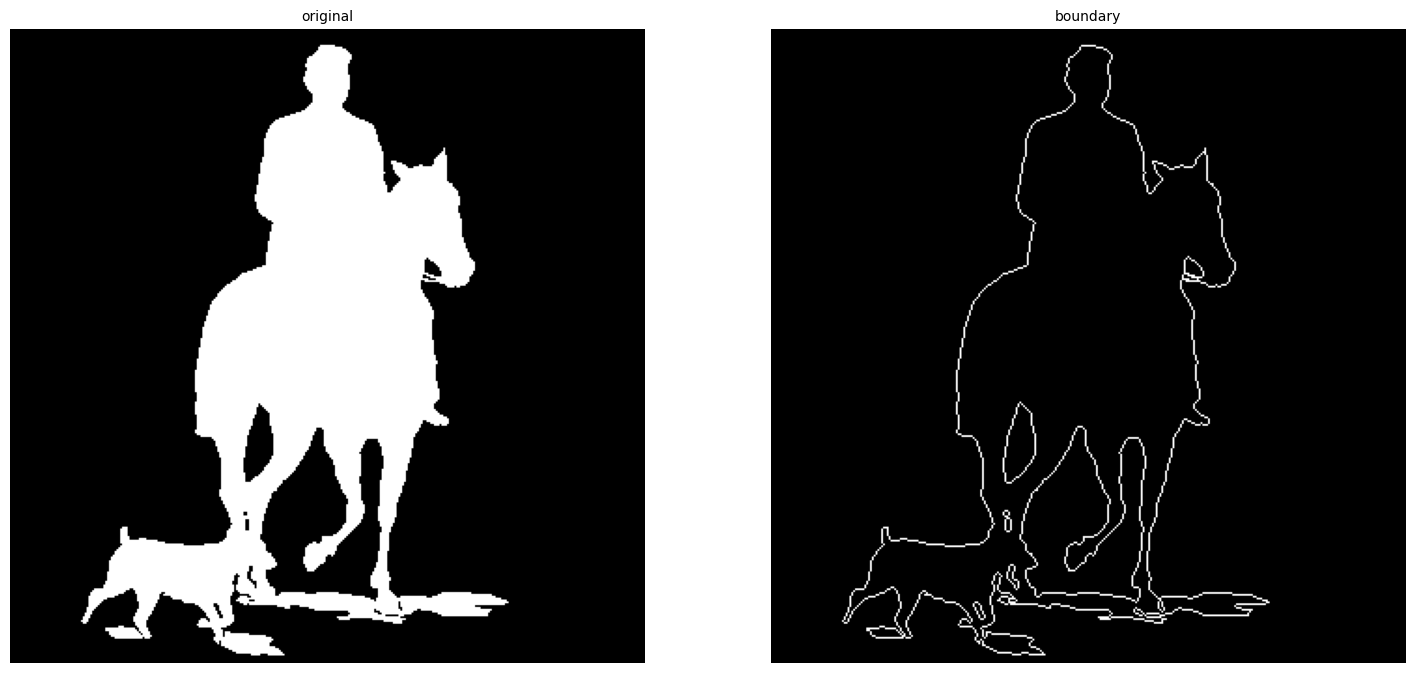

In [ ]:
from skimage.morphology import binary_erosion
im = rgb2gray(imread(path+'horse-dog.jpg'))
threshold = 0.5
im[im < threshold] = 0
im[im >= threshold] = 1
boundary = im - binary_erosion(im)
plot_images_horizontally(im, boundary, 'boundary',sz=(18,9))

#Limpieza con proceso de apertura y cierre

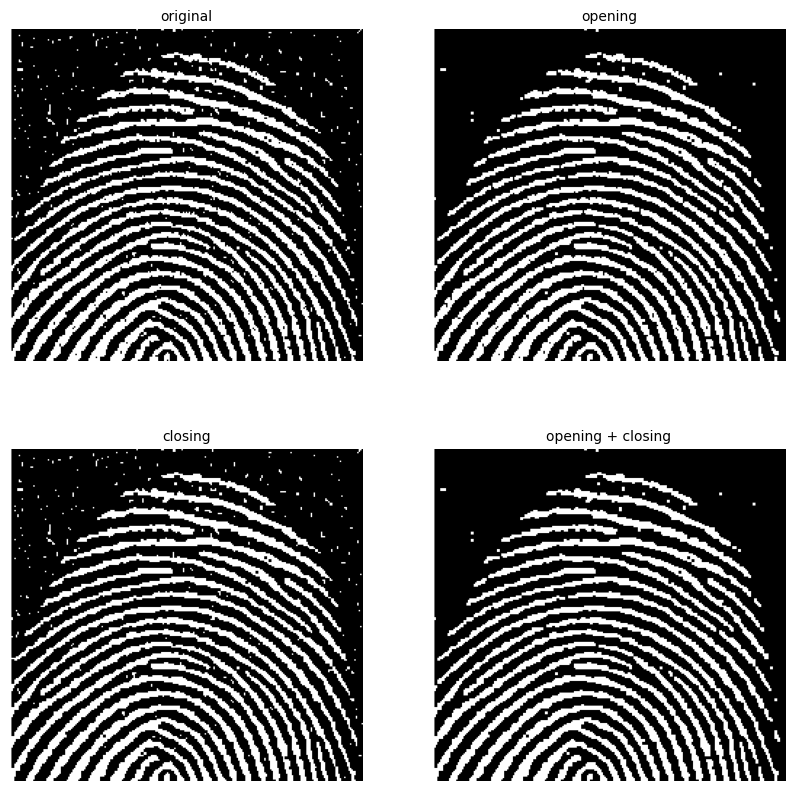

In [ ]:
im = rgb2gray(imread(path+'fingerprint.jpg'))
im[im <= 0.5] = 0 # binarize
im[im > 0.5] = 1
im_o = binary_opening(im, square(2))
im_c = binary_closing(im, square(2))
im_oc = binary_closing(binary_opening(im, square(2)), square(2))
pylab.figure(figsize=(10,10))
pylab.subplot(221), plot_image(im, 'original')
pylab.subplot(222), plot_image(im_o, 'opening')
pylab.subplot(223), plot_image(im_c, 'closing')
pylab.subplot(224), plot_image(im_oc, 'opening + closing')
pylab.show()

#Escala de grises

<Figure size 640x480 with 0 Axes>

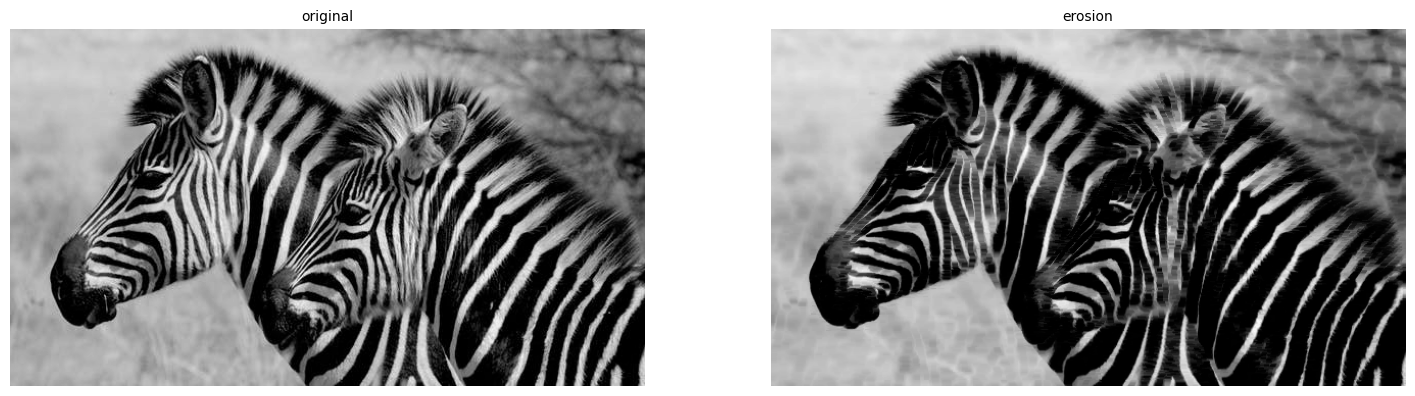

In [ ]:
from skimage.morphology import dilation, erosion, closing, opening
im = imread(path+'zebras.jpg')
im = rgb2gray(im)
struct_elem = rectangle(1,5)#disk(4)#square(5)
eroded = erosion(im, struct_elem)
plot_images_horizontally(im, eroded, 'erosion')

<Figure size 640x480 with 0 Axes>

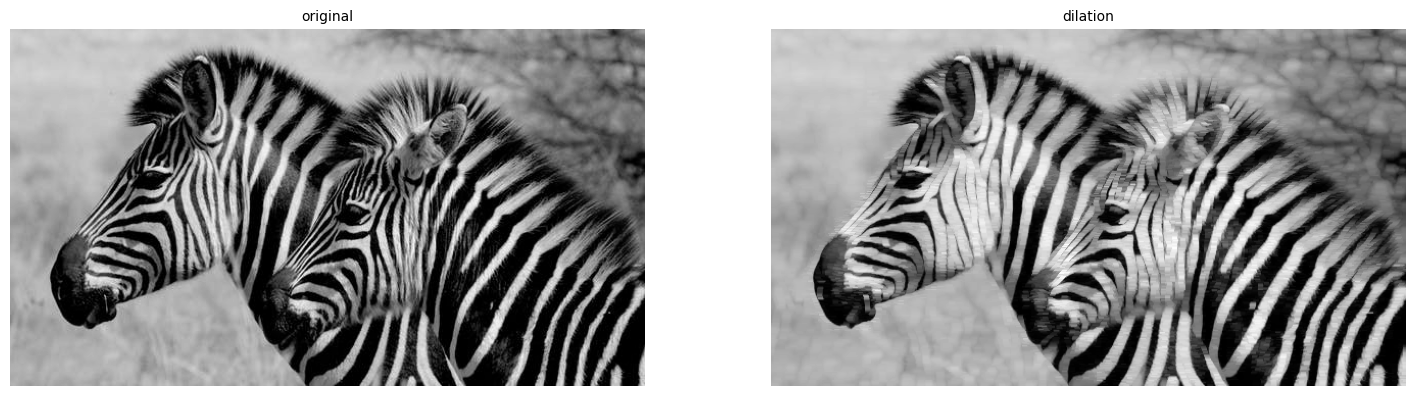

In [ ]:
dilated = dilation(im, struct_elem)
plot_images_horizontally(im, dilated, 'dilation')

<Figure size 640x480 with 0 Axes>

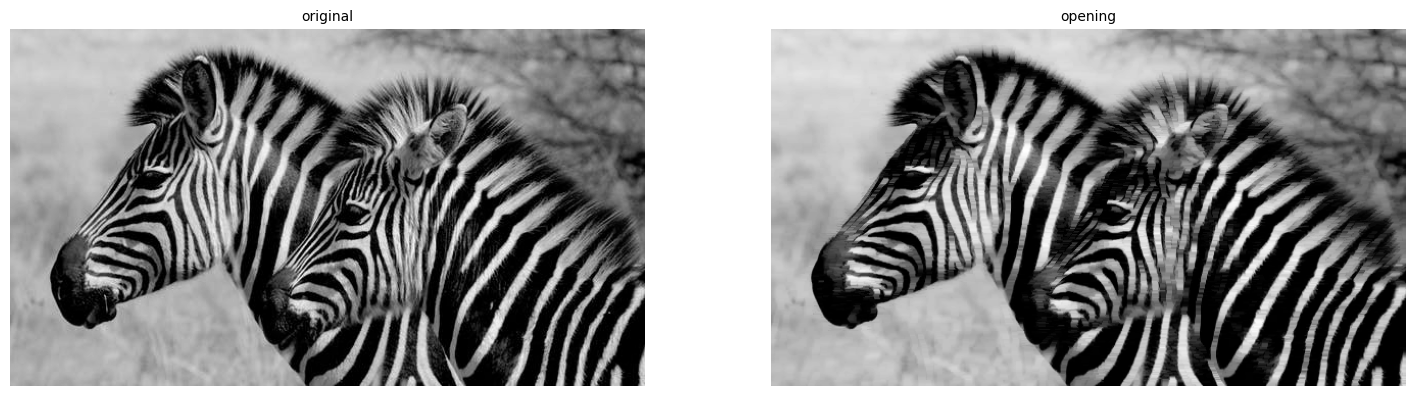

In [ ]:
opened = opening(im, struct_elem)
plot_images_horizontally(im, opened, 'opening')

<Figure size 640x480 with 0 Axes>

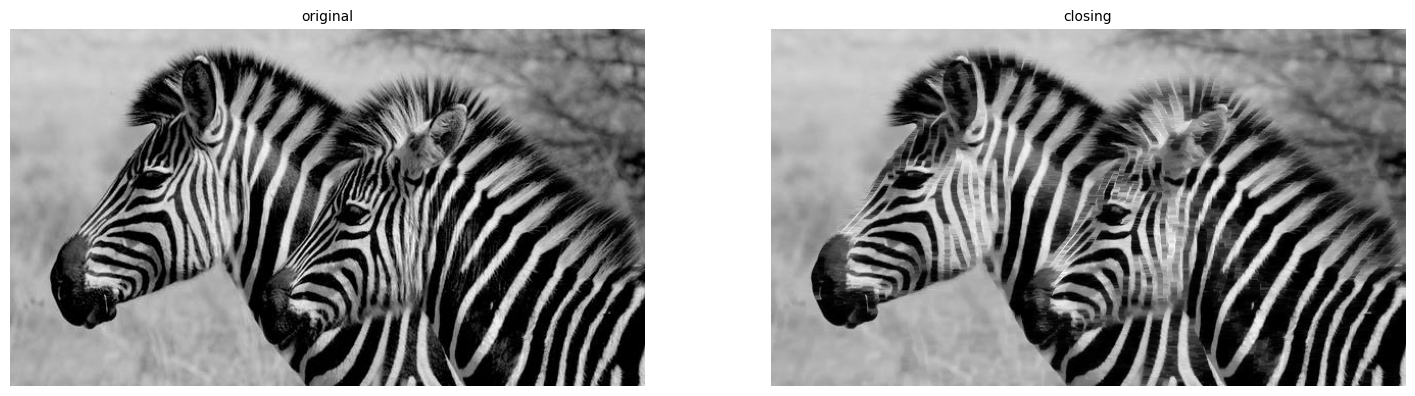

In [ ]:
closed = closing(im, struct_elem)
plot_images_horizontally(im, closed, 'closing')

#Mejora de contraste contra ruido

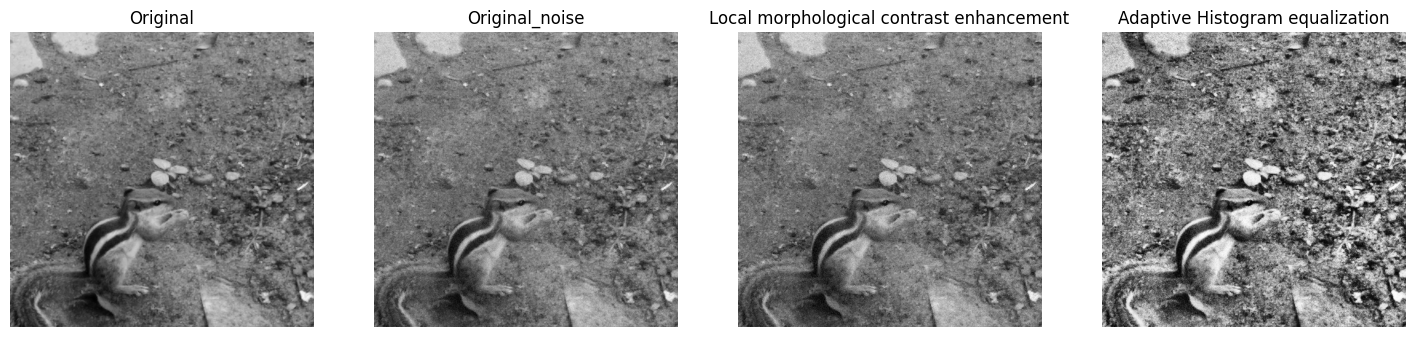

In [ ]:
from skimage.filters.rank import enhance_contrast
from skimage import exposure
def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap=pylab.cm.gray),
    ax.set_title(title), ax.axis('off')
    #ax.set_adjustable('box-forced')

image = rgb2gray(imread(path+'squirrel.jpg'))
sigma = 0.05
noisy_image = np.clip(image + sigma * np.random.standard_normal(image.shape), 0, 1)
enhanced_image = enhance_contrast(noisy_image, disk(1))
equalized_image = exposure.equalize_adapthist(noisy_image,(noisy_image.shape[0]/8,noisy_image.shape[1]/8))

fig, axes = pylab.subplots(1, 4, figsize=[18, 7], sharex='row',sharey='row')
axes1, axes2, axes3,axes4 = axes.ravel()

plot_gray_image(axes1, image, 'Original')
plot_gray_image(axes2, noisy_image, 'Original_noise')
plot_gray_image(axes3, enhanced_image, 'Local morphological contrast enhancement')
plot_gray_image(axes4, equalized_image, 'Adaptive Histogram equalization')

#Eliminación de ruido con filtro de media

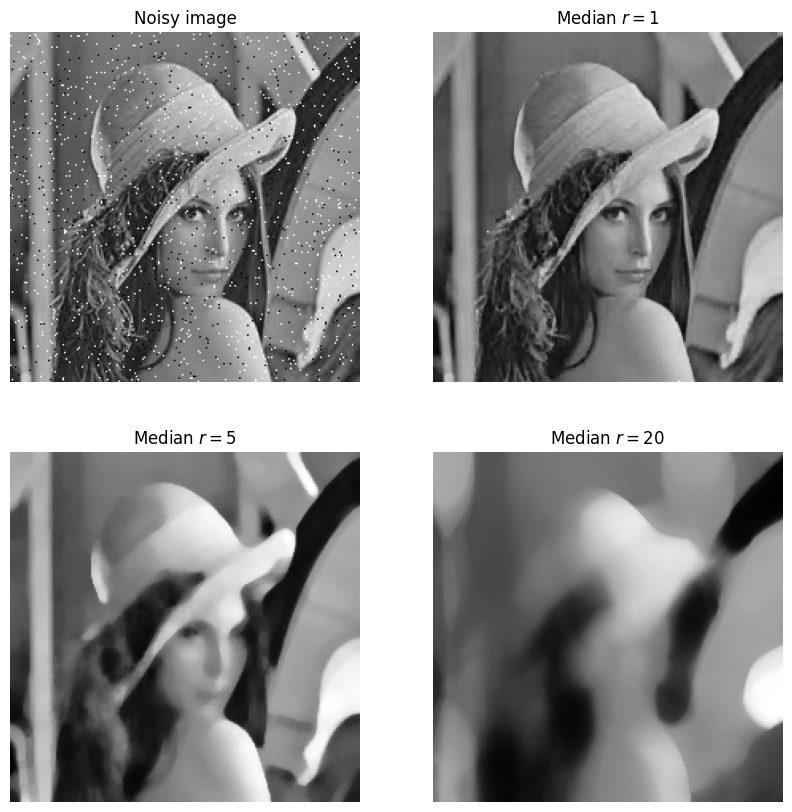

In [ ]:
from skimage.filters.rank import median
from skimage.morphology import disk
noisy_image = (rgb2gray(imread(path+'lena.jpg'))*255).astype(np.uint8)
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.98] = 255
noisy_image[noise < 0.01] = 0
fig, axes = pylab.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes1, axes2, axes3, axes4 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Noisy image')
plot_gray_image(axes2, median(noisy_image, disk(1)), 'Median $r=1$')
plot_gray_image(axes3, median(noisy_image, disk(5)), 'Median $r=5$')
plot_gray_image(axes4, median(noisy_image, disk(20)), 'Median $r=20$')

#Entropía

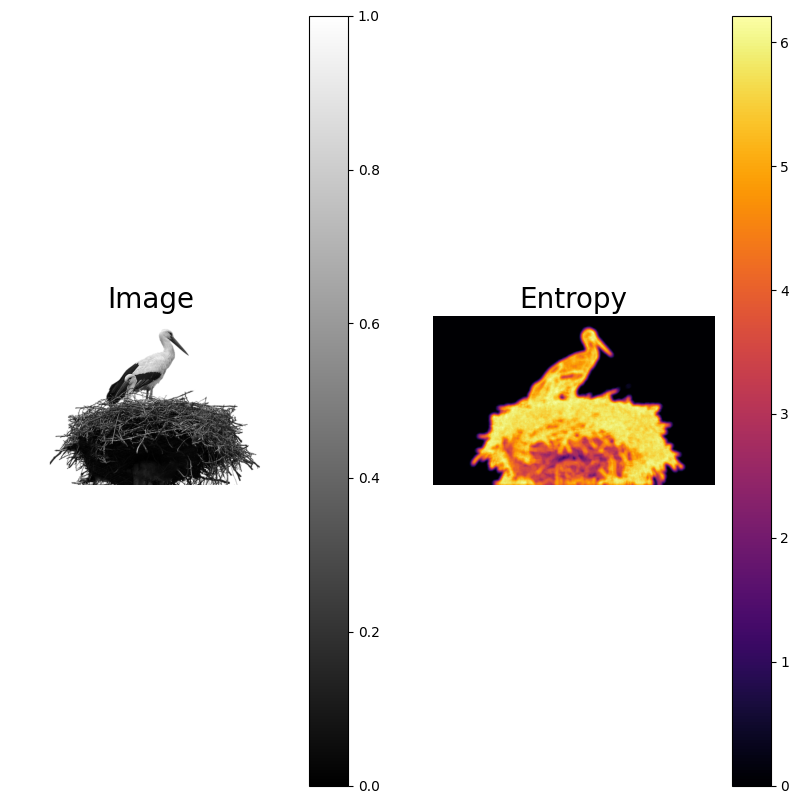

In [ ]:
from skimage.morphology import disk
from skimage.filters.rank import entropy
image = rgb2gray(rgba2rgb(imread(path+'birds.png')))
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
fig.colorbar(axes1.imshow(image, cmap=pylab.cm.gray), ax=axes1)
axes1.axis('off'), axes1.set_title('Image', size=20)
fig.colorbar(axes2.imshow(entropy(image, disk(5)), cmap=pylab.cm.inferno), ax=axes2)
axes2.axis('off'), axes2.set_title('Entropy', size=20)
pylab.show()

#Eliminación de ruido "sal/pimienta"

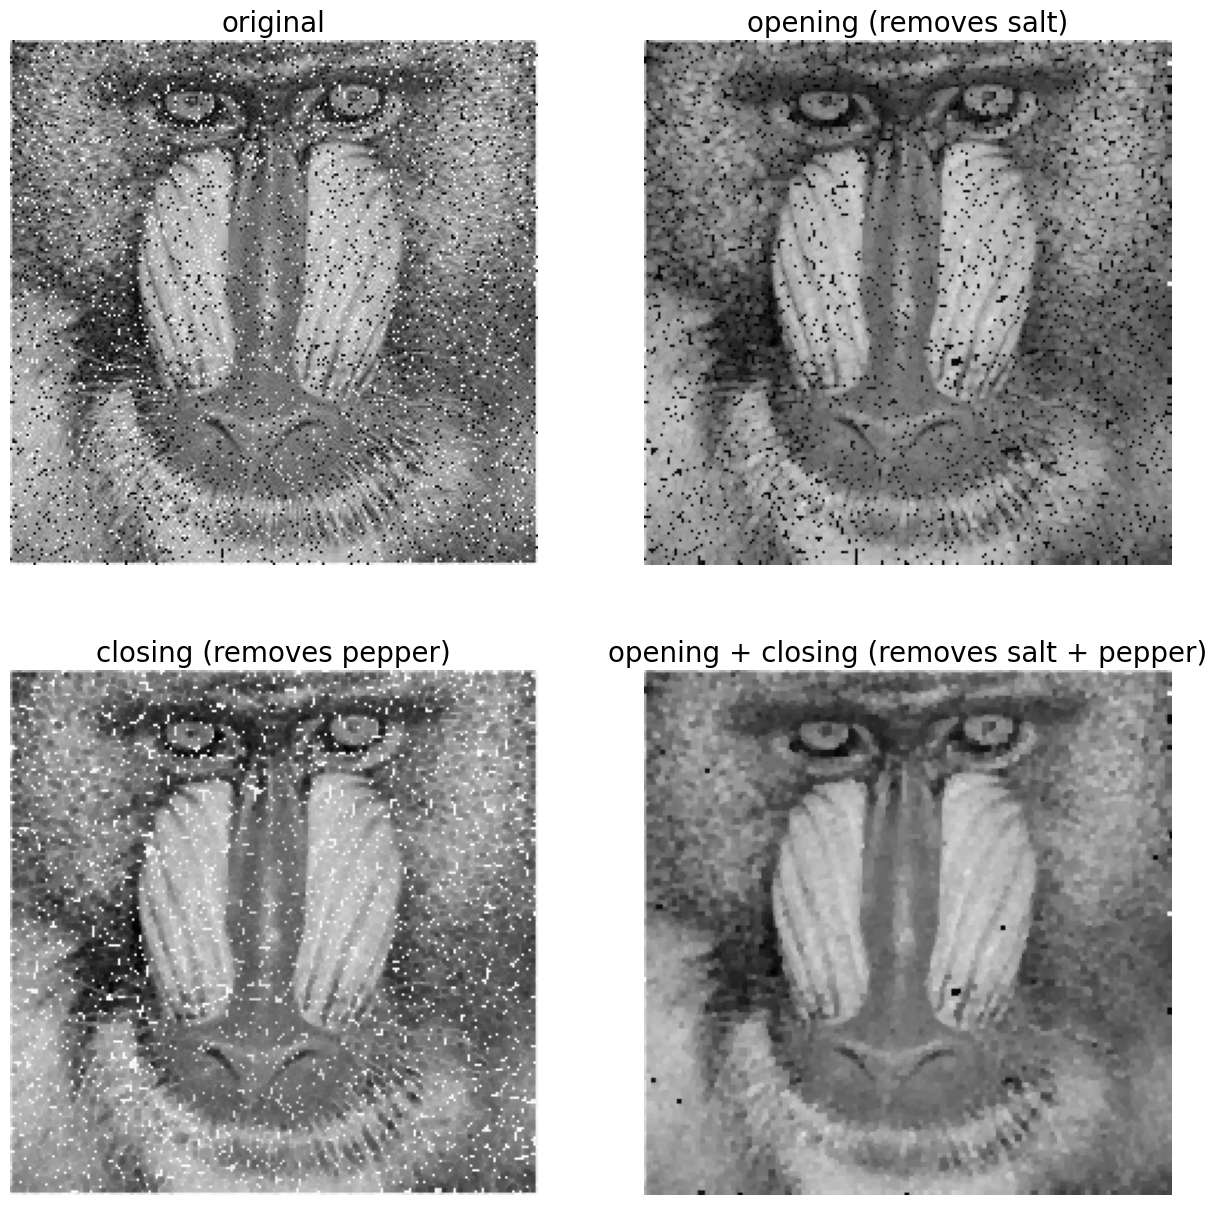

In [ ]:
from scipy import ndimage
im = rgb2gray(imread(path+'mandrill_spnoise_0.1.jpg'))
im_o = ndimage.grey_opening(im, size=(2,2))
im_c = ndimage.grey_closing(im, size=(2,2))
im_oc = ndimage.grey_closing(ndimage.grey_opening(im, size=(2,2)), size=(2,2))
pylab.figure(figsize=(15,15))
pylab.subplot(221), pylab.imshow(im), pylab.title('original', size=20), pylab.axis('off')
pylab.subplot(222), pylab.imshow(im_o), pylab.title('opening (removes salt)', size=20), pylab.axis('off')
pylab.subplot(223), pylab.imshow(im_c), pylab.title('closing (removes pepper)', size=20),pylab.axis('off')
pylab.subplot(224), pylab.imshow(im_oc), pylab.title('opening + closing (removes salt + pepper)', size=20)
pylab.axis('off')
pylab.show()

#Gradiente

<Figure size 640x480 with 0 Axes>

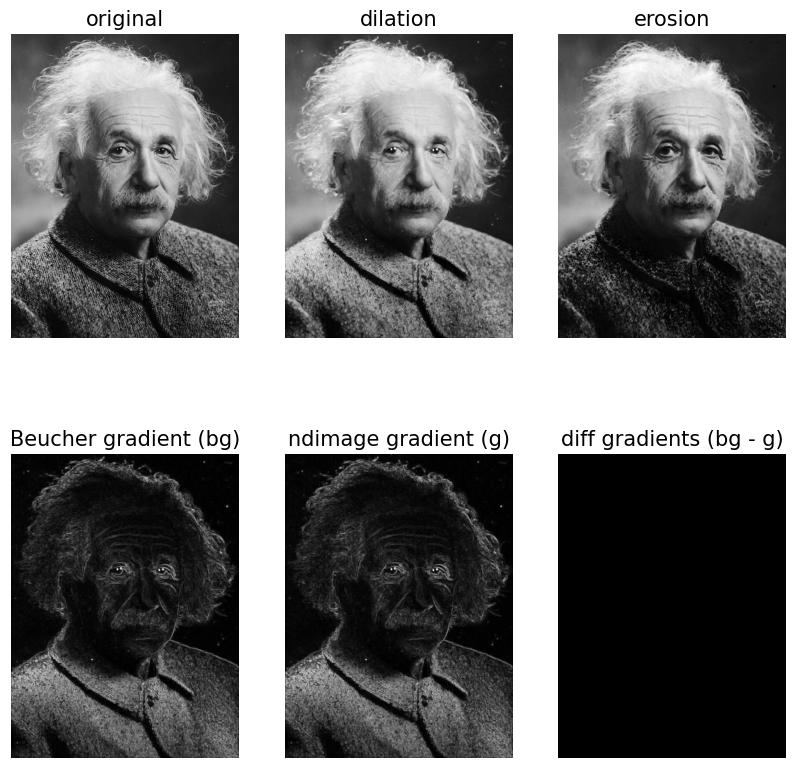

In [ ]:
from scipy import ndimage
im = imread(path+'einstein.jpg')
im_d = ndimage.grey_dilation(im, size=(3,3))
im_e = ndimage.grey_erosion(im, size=(3,3))
im_bg = im_d - im_e
im_g = ndimage.morphological_gradient(im, size=(3,3))
pylab.gray()
pylab.figure(figsize=(10,10))
pylab.subplot(231), pylab.imshow(im), pylab.title('original', size=15),
pylab.axis('off')
pylab.subplot(232), pylab.imshow(im_d), pylab.title('dilation', size=15),
pylab.axis('off')
pylab.subplot(233), pylab.imshow(im_e), pylab.title('erosion', size=15),
pylab.axis('off')
pylab.subplot(234), pylab.imshow(im_bg), pylab.title('Beucher gradient (bg)', size=15), pylab.axis('off')
pylab.subplot(235), pylab.imshow(im_g), pylab.title('ndimage gradient (g)', size=15), pylab.axis('off')
pylab.subplot(236), pylab.title('diff gradients (bg - g)', size=15), pylab.imshow(im_bg - im_g)
pylab.axis('off')
pylab.show()